We are going to use the famous iris data set for our KNN example. 


The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. 



These are the attributes of specific types of iris plant. 


The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 


Further details of the dataset are available here.
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

## Question

Please import, preprocess the data, train-test split, feature scale it, make predictions, and please evaluate it. 

Please also calculate the error rate for K values of 1 to 40. 

In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values.

In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import datasets
import seaborn as sns

file1 = '/Users/dbuettner/nf-ds/KNN/KNN_without_solutions/iris.csv'

df1 = pd.read_csv(file1)

df1.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [99]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [100]:
X_train[:2]

,sepal_length,sepal_width,petal_length,petal_width
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5


In [101]:
knn_model1 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_model1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [102]:
y_pred = knn_model1.predict(X_test)

In [113]:
y_pred[:]

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [104]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [105]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



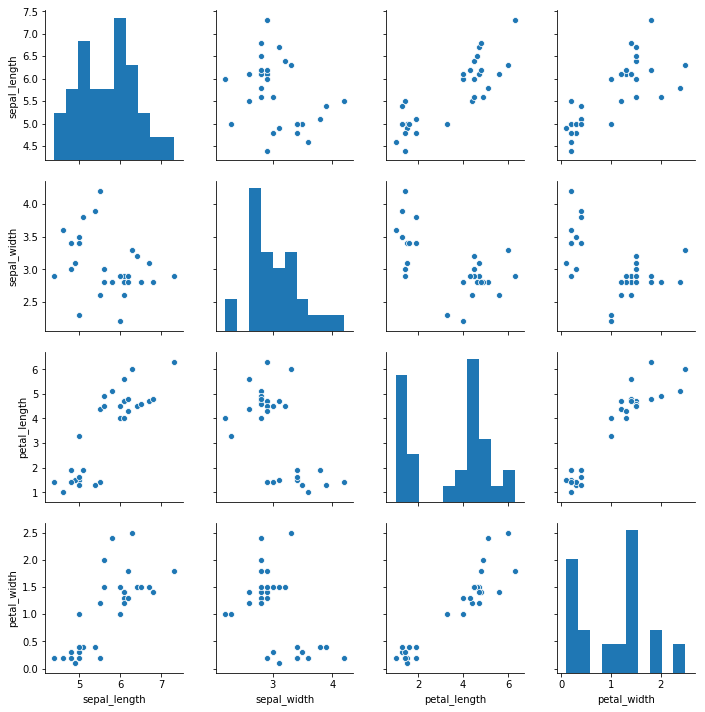

In [106]:
data1 = X_test.join(y_test, how='outer')
sns.pairplot(data1)

In [107]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

## Looping over K values from 1 to 40:

In [108]:
accuracy_rate1 = []
accuracy_rate2 = []
error_rate1 = []
error_rate2 = []


for i in range(1,41):
    knn_model2 = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn_model2.fit(X_train, y_train)
    
    accuracy_rate1.append(accuracy_score(y_train, knn_model2.predict(X_train)))
    accuracy_rate2.append(accuracy_score(y_test, knn_model2.predict(X_test)))
    
    
error_rate1 = [(1 - i) for i in accuracy_rate1]
error_rate2 = [(1 - i) for i in accuracy_rate2]    

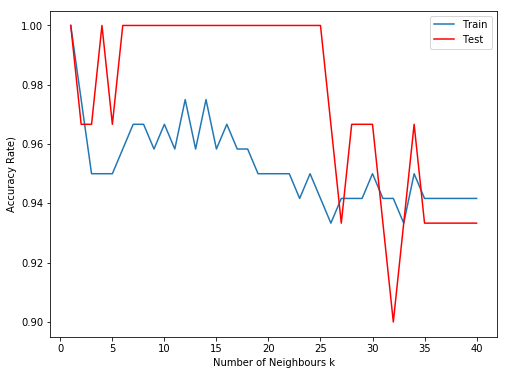

In [112]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1,41)), accuracy_rate1)
plt.plot(list(range(1,41)), accuracy_rate2, c='red')
plt.xlabel('Number of Neighbours k')
plt.ylabel('Accuracy Rate)')
plt.legend(['Train', 'Test'])
plt.show()

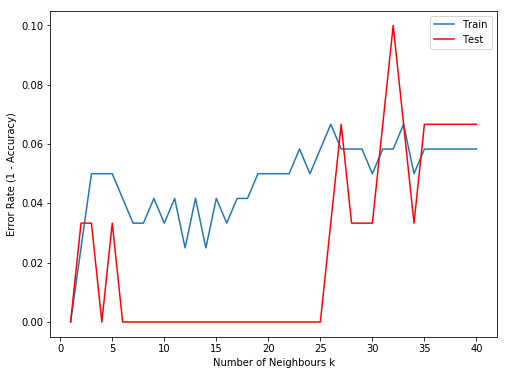

In [110]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1,41)), error_rate1)
plt.plot(list(range(1,41)), error_rate2, c='red')
plt.xlabel('Number of Neighbours k')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.legend(['Train', 'Test'])
plt.show()